In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [3]:
SP500 = pd.read_csv(r"C:\Users\alexa\OneDrive\Desktop\Finance Tut\SP500.csv", parse_dates=["Date"], index_col = "Date", 
                    usecols=["Date", "Close"])

In [4]:
#I dont have excel so this doesnt work

SP500.to_excel("SP500.xls")

In [5]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [6]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   12107 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


In [7]:
SP500 = SP500.Close.to_frame()

In [8]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


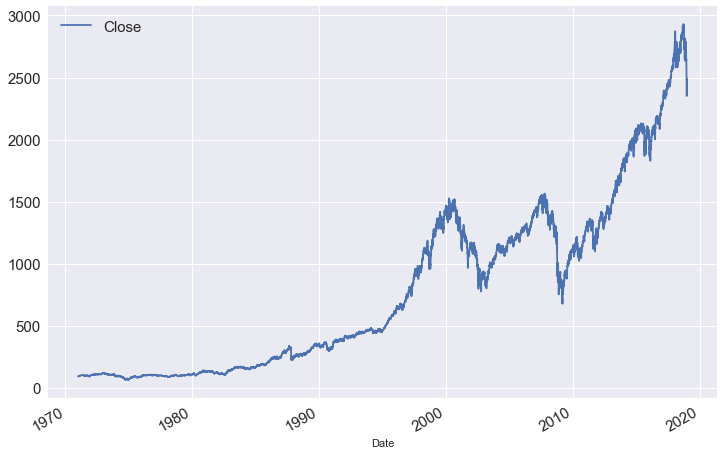

In [9]:

SP500.plot(figsize = (12, 8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [10]:
SP500 = SP500.loc["2008-12-31":"2020-01-11"].copy()

In [11]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0]

In [12]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [13]:
SP500.head(15)

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
2009-01-09,890.349976
2009-01-12,870.260010
2009-01-13,871.789978


In [14]:
#Rolling mean using the previous 10 data values 
SP500.rolling(window = 10).mean().dropna()

,Close
Date,
2009-01-14,898.859997
2009-01-15,892.908996
2009-01-16,884.740997
2009-01-20,872.517993
2009-01-21,863.071991
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [15]:
#Rolling median using the previous 10 data values 
SP500.rolling(window = 10).median().dropna()

,Close
Date,
2009-01-14,904.950012
2009-01-15,898.500000
2009-01-16,881.069977
2009-01-20,871.024994
2009-01-21,860.190002
...,...
2018-12-21,2573.054931
2018-12-24,2546.049926
2018-12-26,2526.449951


In [16]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,920.770007
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [17]:
#Use SMA for momentum trading strategy
SP500["SMA50"] = SP500.Close.rolling(window = 50, min_periods = 50).mean()
SP500

,Close,SMA50
Date,,
2008-12-31,903.250000,NaN
2009-01-02,931.799988,NaN
2009-01-05,927.450012,NaN
2009-01-06,934.700012,NaN
2009-01-07,906.650024,NaN
...,...,...
2018-12-21,2416.620117,2692.420195
2018-12-24,2351.100098,2684.874795
2018-12-26,2467.699951,2678.886196


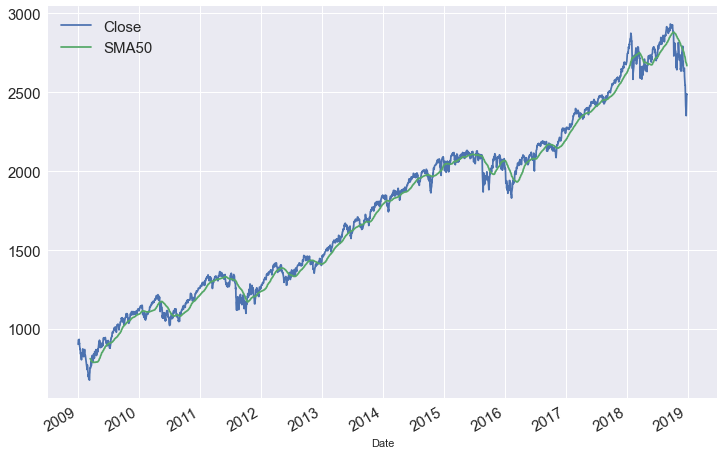

In [18]:
SP500.plot(figsize = (12, 8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [19]:
SP500["SMA200"] = SP500.Close.rolling(window = 200, min_periods = 200).mean()

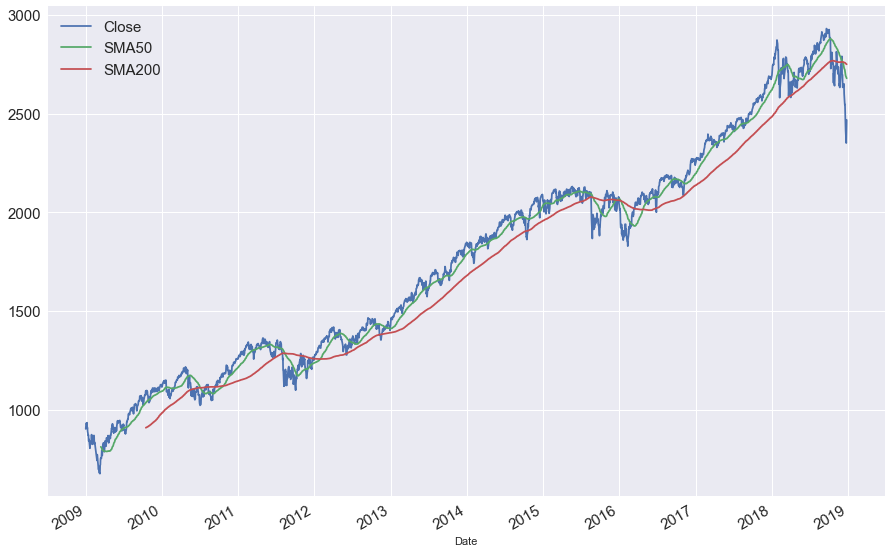

In [20]:
SP500.iloc[:-2].plot(figsize=(15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [21]:

SP500 = SP500.drop(columns = ["SMA200"])

In [22]:

SP500 = SP500.drop(columns = ["SMA50"])

In [23]:

SP500.resample("M", kind = "period").last()

,Close
Date,
2008-12,903.250000
2009-01,825.880005
2009-02,735.090027
2009-03,797.869995
2009-04,872.809998
...,...
2018-08,2901.520020
2018-09,2913.979980
2018-10,2711.739990


In [24]:
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [25]:
month_ret

,Close
Date,
2009-01,-0.085657
2009-02,-0.109931
2009-03,0.085404
2009-04,0.093925
2009-05,0.053081
...,...
2018-08,0.030263
2018-09,0.004294
2018-10,-0.069403


In [26]:
month_ret.rolling(36).mean()*12


,Close
Date,
2009-01,NaN
2009-02,NaN
2009-03,NaN
2009-04,NaN
2009-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [27]:
# I cant figure out why this is wrong.
month_ret["Return"] = month_ret.rolling(36).mean()*12

In [28]:
month_ret.Close.rolling(36).std()*np.sqrt(12)
month_ret

,Close,Return
Date,,
2009-01,-0.085657,NaN
2009-02,-0.109931,NaN
2009-03,0.085404,NaN
2009-04,0.093925,NaN
2009-05,0.053081,NaN
...,...,...
2018-08,0.030263,0.133653
2018-09,0.004294,0.143899
2018-10,-0.069403,0.093103


In [29]:
month_ret["Risk"] = month_ret.Close.rolling(36).std()*np.sqrt(12)

In [30]:
month_ret

,Close,Return,Risk
Date,,,
2009-01,-0.085657,NaN,NaN
2009-02,-0.109931,NaN,NaN
2009-03,0.085404,NaN,NaN
2009-04,0.093925,NaN,NaN
2009-05,0.053081,NaN,NaN
...,...,...,...
2018-08,0.030263,0.133653,0.094305
2018-09,0.004294,0.143899,0.091740
2018-10,-0.069403,0.093103,0.093480


In [31]:
month_ret.dropna(inplace=True)

In [32]:
month_ret.tail()

,Close,Return,Risk
Date,,,
2018-08,0.030263,0.133653,0.094305
2018-09,0.004294,0.143899,0.091740
2018-10,-0.069403,0.093103,0.093480
2018-11,0.017859,0.098888,0.093556
2018-12,-0.099425,0.071590,0.111514


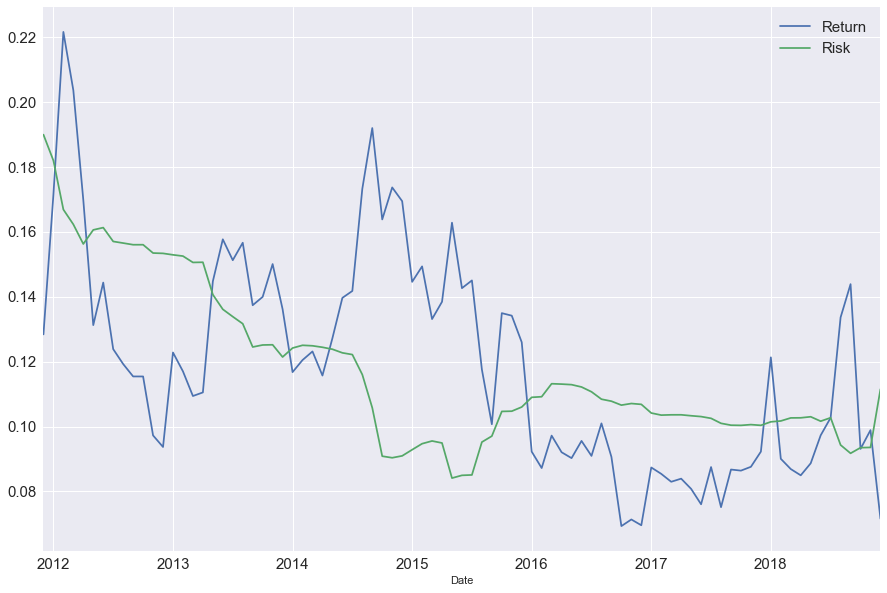

In [33]:
month_ret.iloc[:,-2:].plot(figsize = (15,10), fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [34]:
month_ret.iloc[:,-2:].corr()

,Return,Risk
Return,1.000000,0.286946
Risk,0.286946,1.000000


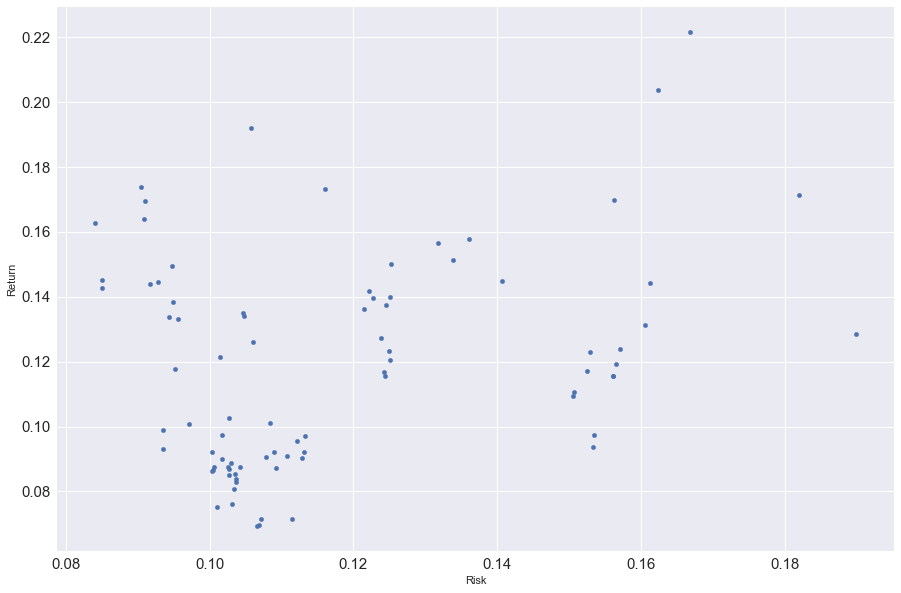

In [35]:
month_ret.iloc[:,-2:].plot(kind= "scatter", x = "Risk", y = "Return", figsize = (15, 10), fontsize = 15)
plt.show()

In [36]:
SP500 = pd.read_csv(r"C:\Users\alexa\OneDrive\Desktop\Finance Tut\SP500.csv", parse_dates=["Date"], index_col = "Date", 
                    usecols=["Date", "Close"])

In [37]:
MR = SP500.resample("M", kind = "period").last().pct_change().dropna()

In [38]:
MR.tail()

,Close
Date,
2018-08,0.030263
2018-09,0.004294
2018-10,-0.069403
2018-11,0.017859
2018-12,-0.099425


In [39]:
MR.columns = ["m_returns"]

In [40]:
MR.rolling(3*12).mean()*12

,m_returns
Date,
1971-01,NaN
1971-02,NaN
1971-03,NaN
1971-04,NaN
1971-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [41]:
year = [1, 3, 5, 10, 20]
for years in year:
    MR["{}Y".format(years)]=MR.m_returns.rolling(years*12).mean()*12

In [42]:
MR.tail()

,m_returns,1Y,3Y,5Y,10Y,20Y
Date,,,,,,
2018-08,0.030263,0.165207,0.133653,0.119980,0.092904,0.066120
2018-09,0.004294,0.150198,0.143899,0.114889,0.102412,0.063215
2018-10,-0.069403,0.058606,0.093103,0.092089,0.112415,0.055730
2018-11,0.017859,0.048383,0.098888,0.090051,0.121685,0.053667
2018-12,-0.099425,-0.060874,0.071590,0.065453,0.110961,0.045877


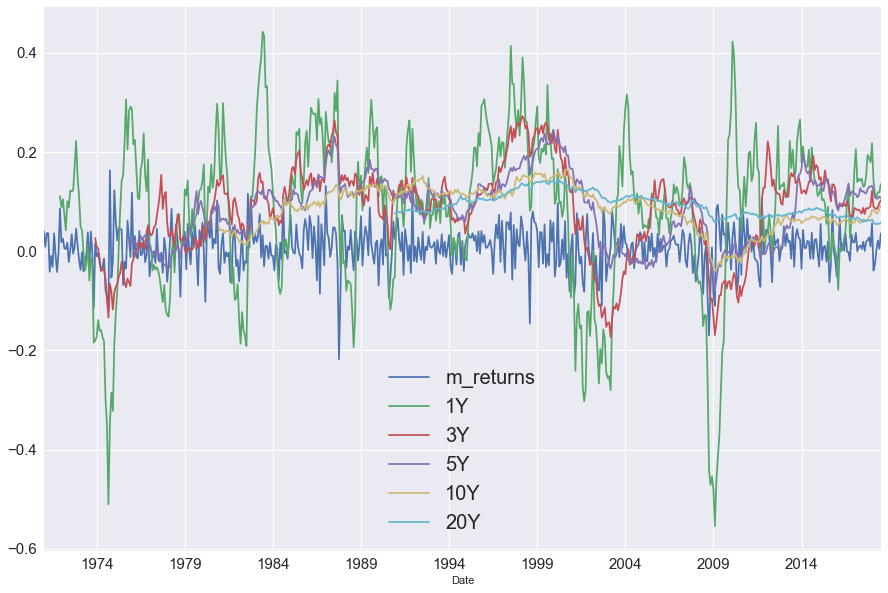

In [43]:
MR.iloc[:-5:].plot(figsize = (15, 10), subplots = False, fontsize = 15, sharey = False)
plt.legend(fontsize = 20)
plt.show()

In [44]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [45]:
df

,Price
2016,100
2017,50
2018,95


In [46]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [47]:
simple_returns.mean()

Price    0.2
dtype: float64

In [48]:
# Tells you the real return over the period.
log_returns = np.log(df / df.shift(1)).dropna()
log_returns

,Price
2017,-0.693147
2018,0.641854


In [49]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [50]:
100*np.exp(2*log_returns.mean())

Price    95.0
dtype: float64

In [51]:
SP500 = SP500.loc["1988-12-30" : "2018-12-31"].copy()

In [52]:
SP500.head()

,Close
Date,
1988-12-30,277.720001
1989-01-03,275.309998
1989-01-04,279.429993
1989-01-05,280.010010
1989-01-06,280.670013


In [53]:
annual = SP500.resample("A", kind = "period").last()
annual

,Close
Date,
1988,277.720001
1989,353.399994
1990,330.220001
1991,417.089996
1992,435.709991
1993,466.450012
1994,459.269989
1995,615.929993
1996,740.739990


In [54]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [55]:
annual.dropna(inplace = True)

In [56]:
annual

,Close,Return
Date,,
1989,353.399994,0.240987
1990,330.220001,-0.067841
1991,417.089996,0.233543
1992,435.709991,0.043675
1993,466.450012,0.068174
1994,459.269989,-0.015513
1995,615.929993,0.293495
1996,740.739990,0.184516
1997,970.429993,0.270090


In [57]:
years = annual.index.size
years

30

In [58]:
windows = [year for year in range(30, 0, -1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [59]:
for year in windows:
    annual["{}".format(year)] = annual.Return.rolling(year).mean()

In [60]:
annual

,Close,Return,30,29,28,27,26,25,24,23,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
1989,353.399994,0.240987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240987
1990,330.220001,-0.067841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086573,-0.067841
1991,417.089996,0.233543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135563,0.082851,0.233543
1992,435.709991,0.043675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.112591,0.069792,0.138609,0.043675
1993,466.450012,0.068174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.103707,0.069388,0.115131,0.055924,0.068174
1994,459.269989,-0.015513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.083837,0.052408,0.082470,0.032112,0.026331,-0.015513
1995,615.929993,0.293495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113789,0.092589,0.124675,0.097458,0.115385,0.138991,0.293495
1996,740.739990,0.184516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.122630,0.105721,0.134648,0.114870,0.132668,0.154166,0.239006,0.184516
1997,970.429993,0.270090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.139014,0.126267,0.153997,0.140740,0.160152,0.183147,0.249367,0.227303,0.270090


In [61]:
triangle = annual.drop(columns = ["Close", "Return"])

In [62]:
triangle

,30,29,28,27,26,25,24,23,22,21,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240987
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086573,-0.067841
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135563,0.082851,0.233543
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.112591,0.069792,0.138609,0.043675
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.103707,0.069388,0.115131,0.055924,0.068174
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.083837,0.052408,0.082470,0.032112,0.026331,-0.015513
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.113789,0.092589,0.124675,0.097458,0.115385,0.138991,0.293495
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.122630,0.105721,0.134648,0.114870,0.132668,0.154166,0.239006,0.184516
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.139014,0.126267,0.153997,0.140740,0.160152,0.183147,0.249367,0.227303,0.270090


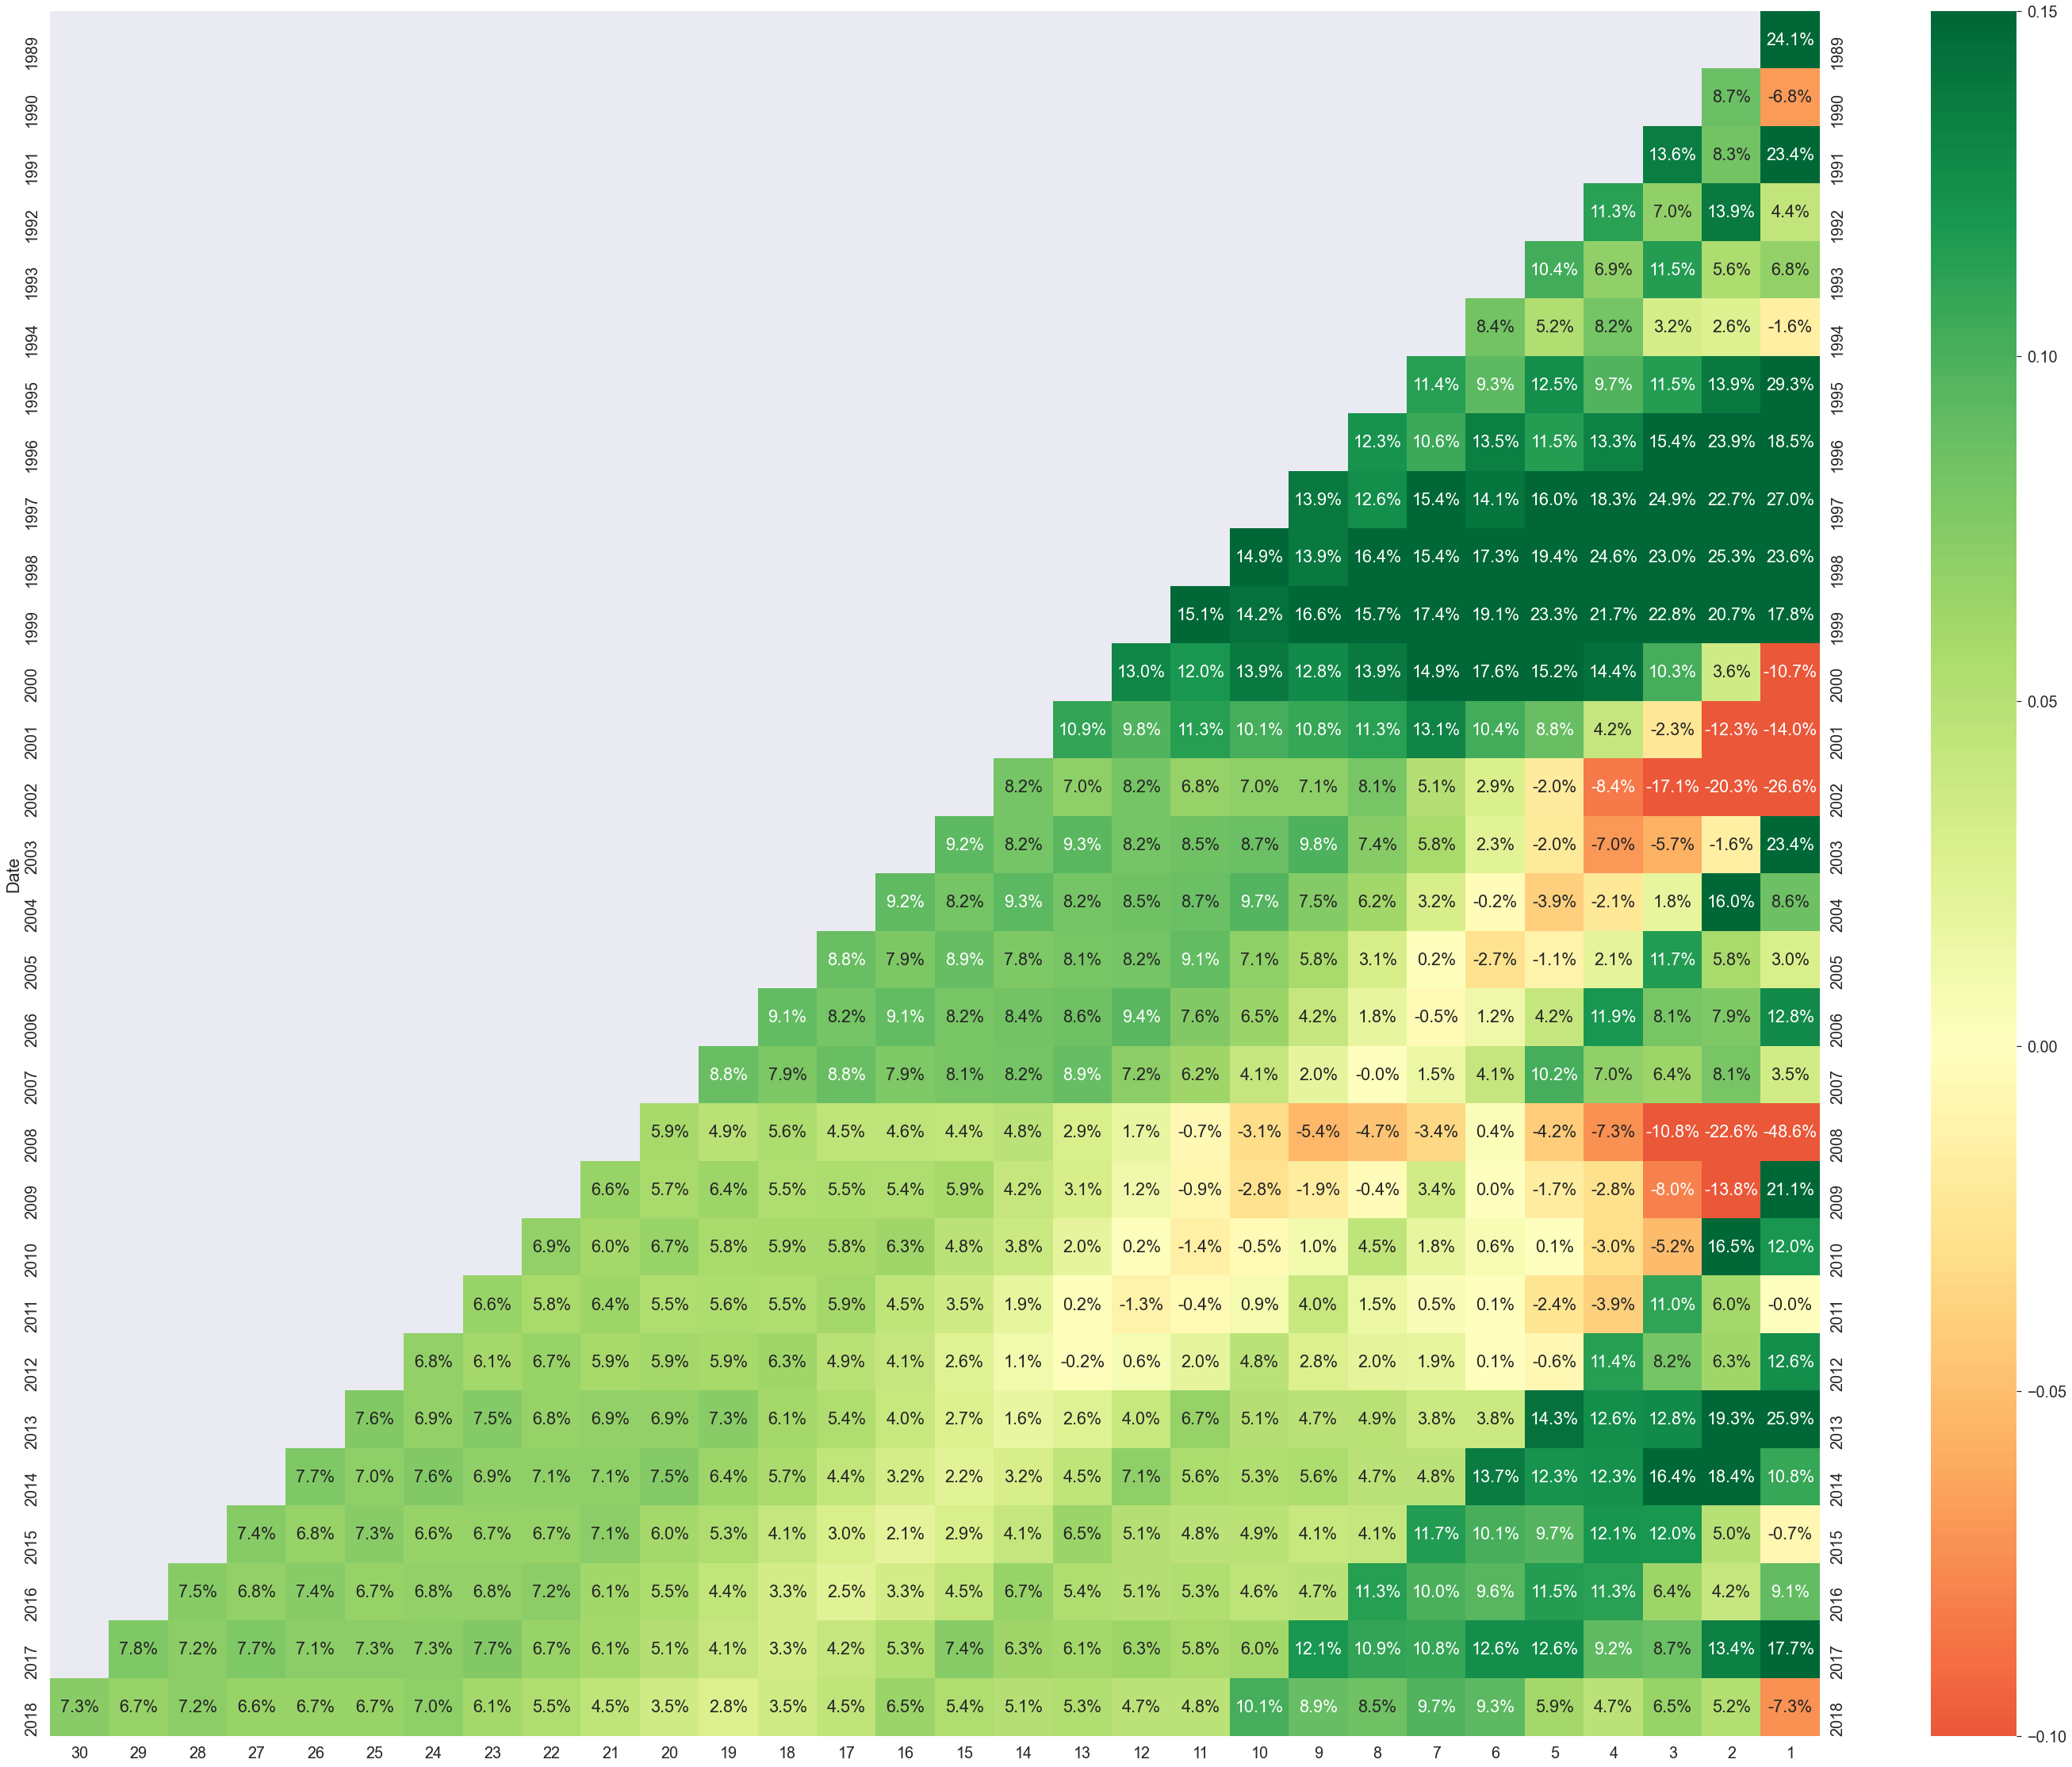

In [63]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot=True, fmt=".1%", cmap ="RdYlGn",
           vmin = -0.10, vmax = 0.15, center = 0 )
plt.tick_params(axis = "y", labelright = True)
plt.show()

In [64]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

Date
1988-12-30            NaN
1989-01-03            NaN
1989-01-04            NaN
1989-01-05            NaN
1989-01-06            NaN
                 ...     
2018-12-21    2547.124619
2018-12-24    2511.483797
2018-12-26    2503.523098
2018-12-27    2500.851640
2018-12-28    2498.104067
Name: Close, Length: 7559, dtype: float64

In [65]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [66]:
SP500

,Close,SMA,EMA
Date,,,
1988-12-30,277.720001,NaN,NaN
1989-01-03,275.309998,NaN,NaN
1989-01-04,279.429993,NaN,NaN
1989-01-05,280.010010,NaN,NaN
1989-01-06,280.670013,NaN,NaN
...,...,...,...
2018-12-21,2416.620117,2785.905496,2732.088580
2018-12-24,2351.100098,2781.282896,2724.544253
2018-12-26,2467.699951,2777.687695,2719.458228


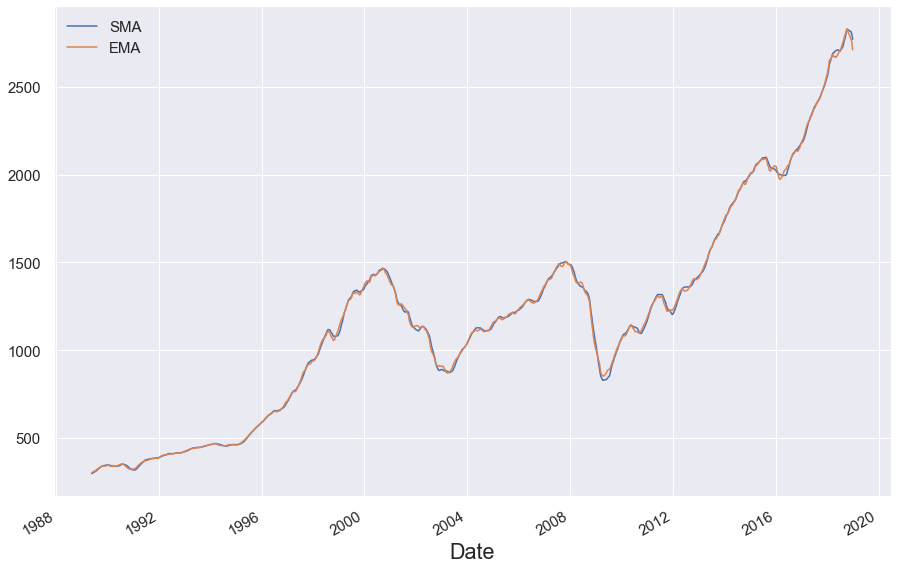

In [67]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [68]:
stocks = pd.read_csv(r"C:\Users\alexa\OneDrive\Desktop\Finance Tut\stocks.csv", header = [0,1], index_col=[0], 
                     parse_dates = [0]).Close

In [69]:
stocks.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,30.10,54.13,32.25,130.90,28.50,30.48
2010-01-04,30.57,56.18,32.07,132.45,28.52,30.95
2010-01-05,30.63,58.02,31.99,130.85,28.17,30.96
2010-01-06,30.14,59.78,31.82,130.00,28.17,30.77
2010-01-07,30.08,62.20,31.83,129.55,28.09,30.45


In [70]:
app_ba = stocks.loc["2009-12-31":"2018", ["AAPL", "BA"]]

In [71]:
app_ba.head()

,AAPL,BA
Date,,
2009-12-31,30.10,54.13
2010-01-04,30.57,56.18
2010-01-05,30.63,58.02
2010-01-06,30.14,59.78
2010-01-07,30.08,62.20


In [72]:
month_ret = app_ba.resample("M", kind = "period").last().pct_change().dropna()

In [73]:
month_ret.head()

,AAPL,BA
Date,,
2010-01,-0.088372,0.119527
2010-02,0.065233,0.042244
2010-03,0.148478,0.149620
2010-04,0.111111,-0.002479
2010-05,-0.016086,-0.113903


In [74]:
month_ret.corr()

,AAPL,BA
AAPL,1.000000,0.229619
BA,0.229619,1.000000


In [75]:
month_ret.AAPL.rolling(36)

Rolling [window=36,center=False,axis=0]

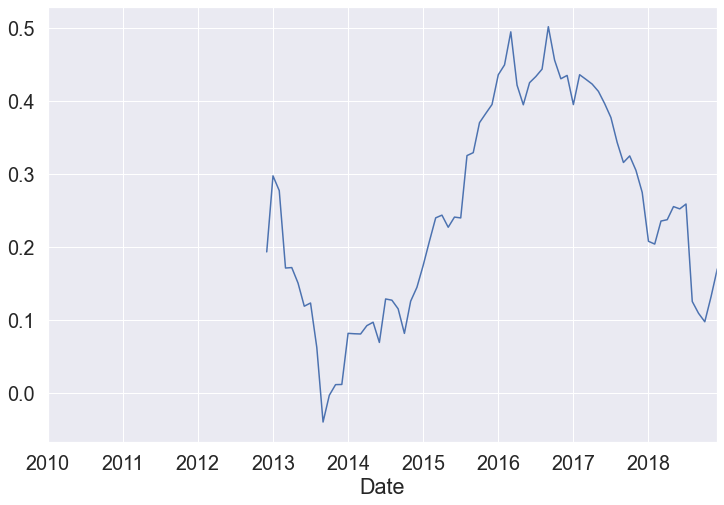

In [76]:
month_ret.AAPL.rolling(36).corr(month_ret.BA).plot(figsize = (12,8))
plt.show()

In [77]:
app_ba.BA.rolling(window = "3D").mean()

Date
2009-12-31     54.130000
2010-01-04     56.180000
2010-01-05     57.100000
2010-01-06     57.993333
2010-01-07     60.000000
                 ...    
2018-12-24    294.160000
2018-12-26    304.045000
2018-12-27    315.535000
2018-12-28    315.816667
2018-12-31    322.500000
Name: BA, Length: 2265, dtype: float64